# Maskin Læring: Klassifisering av dyr

## Trening av vårt første CNN!
![l](https://www.managers.org.uk/wp-content/uploads/2020/03/BrainTraining.jpg)  
I denne notebooken kommer vi til å gjøre et par ting: 
1. Skrive inn studentnummeret vårt
2. Generere et nevralt nettverk(tenk en hjerne) med dette studentnummeret. 
3. Trene dette nettverket

Først så setter vi inn student nummeret vårt.

In [17]:
import numpy as np
import pandas as pd
import os

import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.python.keras.preprocessing.image import ImageDataGenerator

from sklearn.metrics import classification_report, log_loss, accuracy_score
from sklearn.model_selection import train_test_split
!pip3 install tqdm
from tqdm.auto import tqdm

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.


### La oss nå gå inn på kaggle, hente ut api nøkkelen  vår, og legge den inn under.
### Dette gjør sånn at vi kan bruke datasettet som finnes på kaggle.

In [18]:
kaggle_user= "uzaaft"
kaggle_api = "eef66e4e79f6db8c868a369edc57500c"
os.environ["KAGGLE_USERNAME"] = kaggle_user
os.environ["KAGGLE_KEY"] = kaggle_api
!pip install kaggle
!kaggle datasets download -d alessiocorrado99/animals10

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.
100%|███████████████████████████████████████▉| 585M/586M [01:37<00:00, 6.43MB/s]
100%|████████████████████████████████████████| 586M/586M [01:37<00:00, 6.32MB/s]


In [19]:
!unzip -q animals10.zip

In [20]:
import random
Student_nr = input("Hva er student nummeret ditt?")

random.seed(Student_nr)

activation_layers = [
            "relu",
            "sigmoid",
            "softmax",
            "softplus",
            "softsign",
            "tanh",
            "selu",
            "elu",
            "exponential",
]
n = random.randint(1, len(activation_layers))
layer = activation_layers[n]
lr = random.uniform(1e-4, 1e-1)
print(f"Your learning rate is: {lr}")
print(f"Your activation layer is: {layer}")

Hva er student nummeret ditt?104348
Your learning rate is: 0.043148530034139286
Your activation layer is: softsign


In [21]:
base_dir = './raw-img'
LABELS = os.listdir(base_dir)
LABELS.sort()
translate = {"cane": "dog", "cavallo": "horse", "elefante": "elephant",
                 "farfalla": "butterfly", "gallina": "chicken", "gatto": "cat",
                 "mucca": "cow", "pecora": "sheep", "scoiattolo": "squirrel",
                 "dog": "cane", "cavallo": "horse", "elephant" : "elefante", 
                 "butterfly": "farfalla", "chicken": "gallina", "cat": "gatto",
                 "cow": "mucca", "spider": "ragno", "squirrel": "scoiattolo"}
LABELS_english = list(translate.values())
base_dir + '/' + LABELS[0]
dataset=[]
testset=[]
count=0

for label in tqdm(LABELS):
    i=0
#     path = base_dir + '/' + label
    path = os.path.join(base_dir, label)
#     print(path)
    for img in os.listdir(path):
#         print(img)
        image=load_img(os.path.join(path, img), grayscale=False, color_mode='rgb', target_size=(75,75))
        image=img_to_array(image)
        image=image/255.0
        if i<1000:
            dataset.append([image,count])
            i+=1
        else:
            testset.append([image,count])
    count=count+1

X,y =zip(*dataset)
test, test_labels=zip(*testset)
y = to_categorical(y)
y=np.array(y)
X=np.array(X)
print("Train Shape:{}\nTrain Labels shape: {}".format(X.shape,y.shape))
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=99)

datagen = ImageDataGenerator(
    horizontal_flip=True,
    vertical_flip=True,
    rotation_range=20,
    zoom_range=0.2,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.1,
    fill_mode="nearest"
)

  0%|          | 0/10 [00:00<?, ?it/s]

Train Shape:(10000, 75, 75, 3)
Train Labels shape: (10000, 10)


In [22]:
def predict_image(image):
    image=img_to_array(image)/255 
    prediction_image=np.array(image)
    prediction_image= np.expand_dims(image, axis=0)
    
    pred = model.predict(prediction_image)
    value = np.argmax(pred)
    print("Prediction : ", LABELS_english[value])

In [23]:
model = tf.keras.models.Sequential()

model.add(tf.keras.layers.Conv2D(16, (3, 3), activation=layer, input_shape=(75, 75, 3), padding= "valid"))
model.add(tf.keras.layers.MaxPooling2D(3))

model.add(tf.keras.layers.Conv2D(32, (3, 3), activation=layer, padding= "valid"))
model.add(tf.keras.layers.MaxPooling2D(2))

model.add(tf.keras.layers.BatchNormalization())

model.add(tf.keras.layers.Conv2D(64, (3, 3), activation=layer, padding= "valid"))
model.add(tf.keras.layers.MaxPooling2D(1))


model.add(tf.keras.layers.Conv2D(64, (3, 3), activation=layer, padding= "valid"))
model.add(tf.keras.layers.MaxPooling2D(1))

model.add(tf.keras.layers.Flatten())

model.add(tf.keras.layers.Dense(64, activation=layer))
model.add(tf.keras.layers.Dense(32, activation=layer))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dropout(0.2))



model.add(tf.keras.layers.Dense(10, activation='softmax'))
model.summary()

model.compile(loss='categorical_crossentropy',
             optimizer=tf.keras.optimizers.Adam(learning_rate = lr),
             metrics=['acc'])

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 73, 73, 16)        448       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 24, 24, 16)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 22, 22, 32)        4640      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 11, 11, 32)        0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 11, 11, 32)        128       
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 9, 9, 64)          18496     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 9, 9, 64)         

### I cellen ovenfor lager vi modellen. Vi prøver å gjette hvilket dyr det er på bildene med denne ulærte modellen

Prediction :  elephant


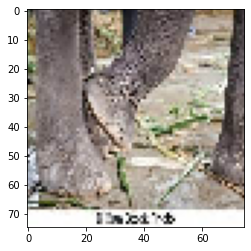

Prediction :  elephant


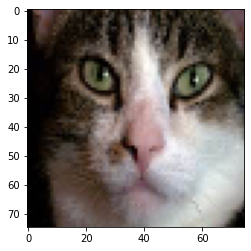

Prediction :  cow


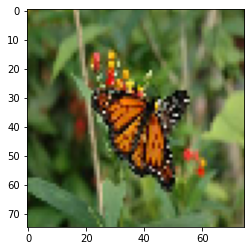

In [24]:
image=load_img("raw-img/elefante/OIP---LeldVL441fx5S66TGgVQAAAA.jpeg",target_size=(75,75))
predict_image(image)
plt.imshow(image)
plt.show()
image=load_img("raw-img/gatto/1006.jpeg",target_size=(75,75))
predict_image(image)
plt.imshow(image)
plt.show()
image=load_img("raw-img/farfalla/OIP--7K5JzW1ZEmrY2YRyVjFCQHaE7.jpeg",target_size=(75,75))
predict_image(image)
plt.imshow(image)
plt.show()

In [25]:
history = model.fit(
     datagen.flow(X_train, y_train, batch_size=256), 
    validation_data = (X_valid, y_valid),
    epochs=25
)

Epoch 1/25
32/32 [==============================] - ETA: 0s - loss: 2.4235 - acc: 0.1021

2021-10-19 14:26:44.036138: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 135000000 exceeds 10% of free system memory.


32/32 [==============================] - 6s 178ms/step - loss: 2.4235 - acc: 0.1021 - val_loss: 2.4022 - val_acc: 0.1025
Epoch 2/25
32/32 [==============================] - 6s 173ms/step - loss: 2.3073 - acc: 0.0986 - val_loss: 2.3941 - val_acc: 0.1020
Epoch 3/25
32/32 [==============================] - 6s 174ms/step - loss: 2.3099 - acc: 0.0934 - val_loss: 2.3655 - val_acc: 0.0965
Epoch 4/25
32/32 [==============================] - 6s 175ms/step - loss: 2.3073 - acc: 0.0960 - val_loss: 2.3433 - val_acc: 0.0970
Epoch 5/25
32/32 [==============================] - 6s 172ms/step - loss: 2.3046 - acc: 0.0996 - val_loss: 2.3261 - val_acc: 0.0965
Epoch 6/25
32/32 [==============================] - 6s 172ms/step - loss: 2.3063 - acc: 0.0953 - val_loss: 2.3195 - val_acc: 0.0970
Epoch 7/25
32/32 [==============================] - 6s 172ms/step - loss: 2.3059 - acc: 0.0930 - val_loss: 2.3177 - val_acc: 0.1015
Epoch 8/25
32/32 [==============================] - 6s 173ms/step - loss: 2.3061 - acc:

### La oss se hvor bra modellen vår gjetter

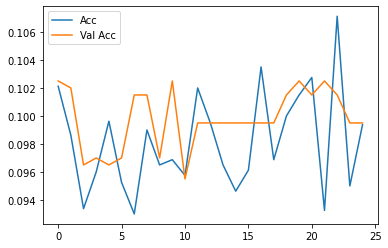

In [26]:
plt.plot(history.history['acc'], label = "Acc")
plt.plot(history.history['val_acc'], label = "Val Acc")
plt.legend()
plt.show()

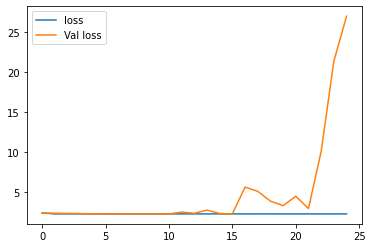

In [27]:
plt.plot(history.history['loss'], label = "loss")
plt.plot(history.history['val_loss'], label = "Val loss")
plt.legend()
plt.show()

Prediction :  cat


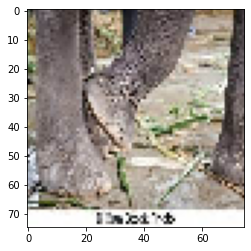

Prediction :  cat


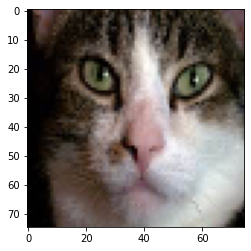

Prediction :  cat


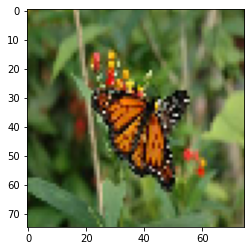

In [28]:
image=load_img("raw-img/elefante/OIP---LeldVL441fx5S66TGgVQAAAA.jpeg",target_size=(75,75))
predict_image(image)
plt.imshow(image)
plt.show()
image=load_img("raw-img/gatto/1006.jpeg",target_size=(75,75))
predict_image(image)
plt.imshow(image)
plt.show()
image=load_img("raw-img/farfalla/OIP--7K5JzW1ZEmrY2YRyVjFCQHaE7.jpeg",target_size=(75,75))
predict_image(image)
plt.imshow(image)
plt.show()

In [29]:
history = model.fit(
     datagen.flow(X_train, y_train, batch_size=256), 
    validation_data = (X_valid, y_valid),
    epochs=100, 
    initial_epoch = 25
)

Epoch 26/150
32/32 [==============================] - 6s 178ms/step - loss: 2.3043 - acc: 0.0957 - val_loss: 17.5278 - val_acc: 0.0995
Epoch 27/150
32/32 [==============================] - 6s 173ms/step - loss: 2.3090 - acc: 0.0974 - val_loss: 9.5430 - val_acc: 0.0995
Epoch 28/150
32/32 [==============================] - 6s 173ms/step - loss: 2.3045 - acc: 0.0996 - val_loss: 6.4188 - val_acc: 0.0995
Epoch 29/150
32/32 [==============================] - 6s 173ms/step - loss: 2.3032 - acc: 0.1013 - val_loss: 5.0191 - val_acc: 0.0995
Epoch 30/150
32/32 [==============================] - 6s 174ms/step - loss: 2.3045 - acc: 0.1051 - val_loss: 4.6904 - val_acc: 0.0995
Epoch 31/150
32/32 [==============================] - 6s 173ms/step - loss: 2.3075 - acc: 0.0997 - val_loss: 4.3810 - val_acc: 0.0995
Epoch 32/150
32/32 [==============================] - 6s 173ms/step - loss: 2.3067 - acc: 0.1010 - val_loss: 4.6347 - val_acc: 0.0995
Epoch 33/150
32/32 [==============================] - 6s 175m

32/32 [==============================] - 6s 172ms/step - loss: 2.3065 - acc: 0.0997 - val_loss: 2.3076 - val_acc: 0.0995
Epoch 88/150
32/32 [==============================] - 6s 172ms/step - loss: 2.3068 - acc: 0.1005 - val_loss: 2.3087 - val_acc: 0.0995
Epoch 89/150
32/32 [==============================] - 6s 174ms/step - loss: 2.3092 - acc: 0.0929 - val_loss: 2.3685 - val_acc: 0.0985
Epoch 90/150
32/32 [==============================] - 6s 172ms/step - loss: 2.3098 - acc: 0.1004 - val_loss: 2.9463 - val_acc: 0.0995
Epoch 91/150
32/32 [==============================] - 6s 172ms/step - loss: 2.3068 - acc: 0.1006 - val_loss: 9.7579 - val_acc: 0.0950
Epoch 92/150
32/32 [==============================] - 6s 174ms/step - loss: 2.3070 - acc: 0.1053 - val_loss: 5.4571 - val_acc: 0.0955
Epoch 93/150
32/32 [==============================] - 6s 173ms/step - loss: 2.3055 - acc: 0.1013 - val_loss: 19.5753 - val_acc: 0.1125
Epoch 94/150
32/32 [==============================] - 6s 173ms/step - loss

Epoch 148/150
32/32 [==============================] - 6s 171ms/step - loss: 2.3094 - acc: 0.0976 - val_loss: 2.3262 - val_acc: 0.0970
Epoch 149/150
32/32 [==============================] - 6s 172ms/step - loss: 2.3080 - acc: 0.0935 - val_loss: 2.3310 - val_acc: 0.0970
Epoch 150/150
32/32 [==============================] - 6s 173ms/step - loss: 2.3068 - acc: 0.0962 - val_loss: 2.3634 - val_acc: 0.0970


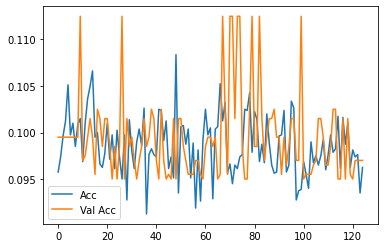

In [30]:
plt.plot(history.history['acc'], label = "Acc")
plt.plot(history.history['val_acc'], label = "Val Acc")
plt.legend()
plt.show()

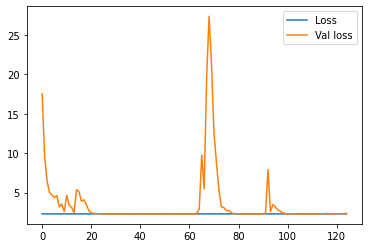

In [31]:
plt.plot(history.history['loss'],  label = "Loss")
plt.plot(history.history['val_loss'],  label = "Val loss")
plt.legend()
plt.show()

In [32]:
image=load_img("raw-img/elefante/OIP---LeldVL441fx5S66TGgVQAAAA.jpeg",target_size=(75,75))
predict_image(image)
plt.imshow(image)
plt.show()
image=load_img("raw-img/gatto/1006.jpeg",target_size=(75,75))
predict_image(image)
plt.imshow(image)
plt.show()
image=load_img("raw-img/farfalla/OIP--7K5JzW1ZEmrY2YRyVjFCQHaE7.jpeg",target_size=(75,75))
predict_image(image)
plt.imshow(image)
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: 'raw-img/elefante/OIP---LeldVL441fx5S66TGgVQAAAA.jpeg'